In [111]:
# Load Library

packages <- c("dplyr", "haven","ggplot2","MASS", "randomForest", "caret", "ranger", "parallel")

install_if_missing <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
  }
  library(pkg, character.only = TRUE)
}

lapply(packages, install_if_missing)

select <- dplyr::select

[[1]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[2]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[3]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[4]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[5]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[6]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[7]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[8]]
 [1] "modeest"      "parallel"     "ranger"       "caret"        "lattice"     
 [6] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"

In [6]:
#Filter the BMI<25

In [7]:
df1 <- read.csv("Data/merge_df_cln.csv") %>% 
  filter(cc_bmi == "<25") %>% 
  select("bp_sys_mean","DRXTPROT", "DRXTCARB", "DRXTTFAT", "DRXTSFAT", "DRXTMFAT", "DRXTPFAT", "DRXTCHOL", "DRXTFIBE", 
"DRXTVB6", "DRXTVB12", "DRXTFOLA", "DRXTVC", "DRXTCALC", "DRXTPHOS", "DRXTMAGN", "DRXTIRON", 
"DRXTZINC", "DRXTCOPP", "DRDTSODI", "DRXTPOTA", "DRXTSELE", "DRXTCAFF", "DRXTTHEO", "DRXTALCO", 
 "DRXTS040", "DRXTS060", "DRXTS080", "DRXTS100", "DRXTS120", "DRXTS140", "DRXTS160", 
"DRXTS180", "DRXTM161", "DRXTM181", "DRXTM201", "DRXTM221", "DRXTP182", "DRXTP183", "DRXTP184", 
"DRXTP204", "DRXTP205", "DRXTP225", "DRXTP226", "DRD320GW"
) 
head(df1)

,bp_sys_mean,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVB6,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100.6667,123.16,350.37,71.95,24.34,26.48,11.94,313.95,36.99,2.90,⋯,0.09,0.02,10.07,1.14,0,0.26,0.00,0.01,0.02,0.00
2,114.6667,24.63,202.11,25.15,7.78,7.84,7.15,38.45,6.24,0.97,⋯,0.05,0.01,6.41,0.69,0,0.03,0.00,0.00,0.00,1711.00
3,147.3333,39.62,112.24,33.87,18.61,10.18,2.37,124.95,16.36,0.77,⋯,0.00,0.00,1.86,0.49,0,0.02,0.00,0.00,0.00,236.00
4,94.0000,99.84,334.43,136.90,49.38,55.83,23.51,292.98,14.21,1.69,⋯,0.24,0.01,21.10,2.10,0,0.13,0.01,0.02,0.04,1652.00
5,128.0000,20.03,120.16,32.94,16.95,10.38,3.71,96.73,3.48,0.21,⋯,0.03,0.00,3.08,0.53,0,0.00,0.00,0.00,0.00,663.75
6,110.6667,71.13,279.65,133.93,35.73,52.33,37.34,293.94,18.41,1.90,⋯,0.24,0.00,32.66,4.27,0,0.18,0.01,0.03,0.06,1622.50


In [15]:
# Calculate the R_squred

In [16]:
options(scipen = 999)
cordf1 <- data.frame(Variable = setdiff(names(df1), "bp_sys_mean"))
cordf1$r_squared <- sapply(cordf1$Variable,
                          function(var) 

cor(df1[[var]],df1$bp_sys_mean)^2)

cordf1 <- cordf1[order(-cordf1$r_squared), ]

print(cordf1)

   Variable     r_squared
2  DRXTCARB 0.00910158833
3  DRXTTFAT 0.00737035084
5  DRXTMFAT 0.00718538263
31 DRXTS160 0.00709354287
4  DRXTSFAT 0.00703898941
34 DRXTM181 0.00686625396
13 DRXTCALC 0.00685780791
19 DRDTSODI 0.00672854238
32 DRXTS180 0.00648933311
14 DRXTPHOS 0.00633526695
1  DRXTPROT 0.00575091472
30 DRXTS140 0.00554463266
25 DRXTS040 0.00494643088
44 DRD320GW 0.00447074330
37 DRXTP182 0.00432107794
33 DRXTM161 0.00423273915
6  DRXTPFAT 0.00403281967
28 DRXTS100 0.00333260642
26 DRXTS060 0.00312955454
17 DRXTZINC 0.00278606802
21 DRXTSELE 0.00278286456
15 DRXTMAGN 0.00241113941
27 DRXTS080 0.00237413029
16 DRXTIRON 0.00218036868
11 DRXTFOLA 0.00199145670
23 DRXTTHEO 0.00180236289
38 DRXTP183 0.00147132750
24 DRXTALCO 0.00118289724
9   DRXTVB6 0.00114378880
35 DRXTM201 0.00099911878
20 DRXTPOTA 0.00094606932
18 DRXTCOPP 0.00073643298
8  DRXTFIBE 0.00062395547
29 DRXTS120 0.00062358531
7  DRXTCHOL 0.00050171473
12   DRXTVC 0.00046054116
40 DRXTP204 0.00025537308
43 DRXTP226 

In [17]:
# Use forward selection method

In [18]:
fit_model_df1 <- function(response, predictors, data) {
  models <- list()
  formula_str <- response 
  for (i in seq_along(predictors)) {
    formula_str <- paste(formula_str, "+", predictors[i]) 
    models[[i]] <- lm(as.formula(paste("bp_sys_mean ~", paste(predictors[1:i], collapse = " + "))), data = data)
  }
  
  return(models)
}
sort_vars <- cordf1$Variable
df1_models <- fit_model_df1(response = "bp_sys_mean", predictors = sort_vars, data = df1)


In [19]:
# Use AIC to select the model

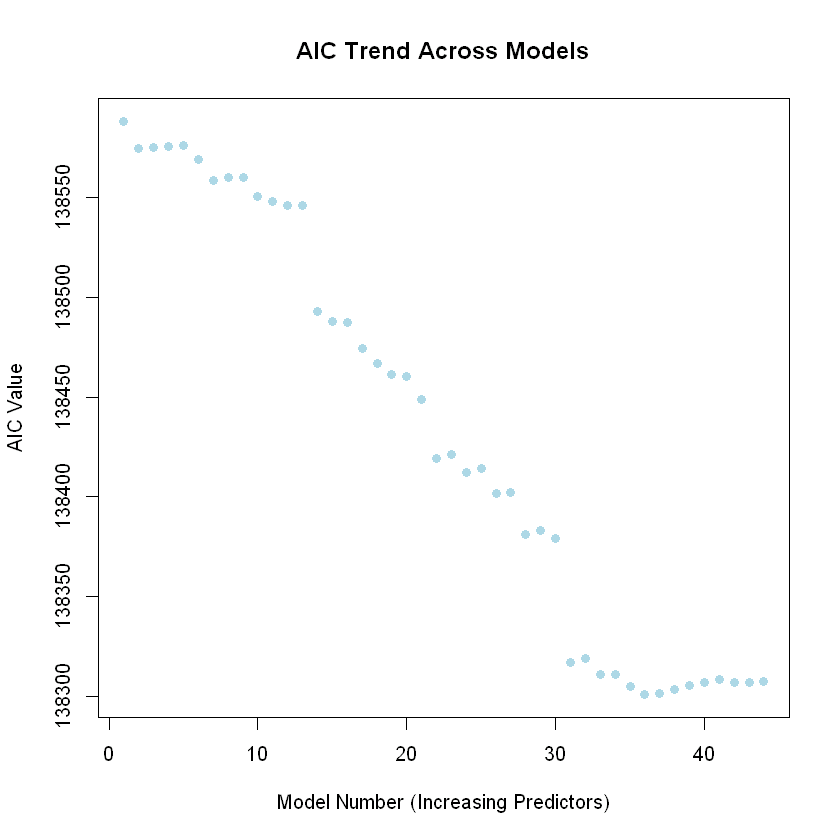

In [20]:
df1_models_aic <- sapply(df1_models, AIC)
model_nums <- seq_along(df1_models_aic)

plot(model_nums, df1_models_aic, pch = 19, col = "lightblue",
     xlab = "Model Number (Increasing Predictors)", 
     ylab = "AIC Value",
     main = "AIC Trend Across Models")

In [21]:
# Stepwise Model 

In [25]:
library(MASS)
full_model <- lm(bp_sys_mean ~ ., data = df1)
best_model <- stepAIC(full_model, direction = "both", trace = FALSE)  

In [28]:
sqrt(mean(resid(best_model)^2))

[1] 19.22983

# Maching Learning

In [126]:
df1 <- read.csv("Data/merge_df_cln.csv")
df1 <- df1 %>% 
        mutate(hyper = ifelse((bp_sys_mean >= 140 | bp_dia_mean >= 90), 1 , 0)) %>% 
        #filter(htn_aware == "No") %>% 
        dplyr::select(-"X", -"bp_sys_mean", -"svy_id", -"bp_dia_mean", -"htn_aware")

colnames(df1)
# df1$hyper <- as.factor(df1$hyper)
# summary(df1$hyper)

[1] "svy_year"        "demo_age_cat"    "demo_race"       "demo_race_black"
 [5] "demo_age_years"  "demo_pregnant"   "demo_gender"     "cc_bmi"         
 [9] "DRXTPROT"        "DRXTCARB"        "DRXTTFAT"        "DRXTSFAT"       
[13] "DRXTMFAT"        "DRXTPFAT"        "DRXTCHOL"        "DRXTFIBE"       
[17] "DRXTVB6"         "DRXTVB12"        "DRXTFOLA"        "DRXTVC"         
[21] "DRXTCALC"        "DRXTPHOS"        "DRXTMAGN"        "DRXTIRON"       
[25] "DRXTZINC"        "DRXTCOPP"        "DRDTSODI"        "DRXTPOTA"       
[29] "DRXTSELE"        "DRXTCAFF"        "DRXTTHEO"        "DRXTALCO"       
[33] "DRXTMOIS"        "DRXTS040"        "DRXTS060"        "DRXTS080"       
[37] "DRXTS100"        "DRXTS120"        "DRXTS140"        "DRXTS160"       
[41] "DRXTS180"        "DRXTM161"        "DRXTM181"        "DRXTM201"       
[45] "DRXTM221"        "DRXTP182"        "DRXTP183"        "DRXTP184"       
[49] "DRXTP204"        "DRXTP205"        "DRXTP225"        "DRXTP226"       
[53] "DRD320GW"        "hyper"

In [127]:
table(df1$hyper)

# Separate majority and minority classes
df1_majority <- df1 %>% filter(hyper == 1)
df1_minority <- df1 %>% filter(hyper == 0)

# Oversample minority class (duplicate existing data)
df1_minority_oversampled <- df1_minority %>% sample_n(nrow(df1_majority), replace = FALSE)

# Combine balanced dataset
df1_balanced <- bind_rows(df1_majority, df1_minority_oversampled)

# Check new class distribution
table(df1_balanced$hyper)
df1 <- df1_balanced


    0     1 
40565  9998 


   0    1 
9998 9998 

In [128]:
# df1 <- read.csv("Data/merge_df_cln.csv")
# df1 <- df1 %>% 
#         mutate(hyper = ifelse((bp_sys_mean >= 140), 1 , 0)) %>% 
#         dplyr::select(-"X", -"svy_id", -"bp_sys_mean",- "demo_age_cat")

# colnames(df1)
# df1$hyper <- as.factor(df1$hyper)
# summary(df1$hyper)

In [129]:
# Split into training (70%) and testing (30%) sets
set.seed(123)
train_index <- createDataPartition(df1$hyper, p = 0.8, list = FALSE)
train_data <- df1[train_index, ]
test_data <- df1[-train_index, ]

train_data$hyper <- as.factor(train_data$hyper)
test_data$hyper <- as.factor(test_data$hyper)

In [130]:
# Check available CPU cores
num_cores <- detectCores()
print(paste("Using", num_cores, "cores"))

# Train Random Forest classification model with multi-threading
rf_model <- ranger(hyper ~ ., data = train_data, 
                   num.trees = 500, 
                   mtry = sqrt(ncol(train_data) - 1), 
                   importance = "impurity",
                   probability = TRUE,  # Enables probability prediction
                   num.threads = num_cores)

# Predict class probabilities on the test set
predictions <- predict(rf_model, test_data)$predictions

# Convert probabilities to class labels
predicted_class <- ifelse(predictions[,2] > 0.5, "1", "0")  # Threshold at 0.5
predicted_class <- factor(predicted_class, levels = levels(test_data$hyper))

# Model Evaluation
conf_matrix <- confusionMatrix(predicted_class, test_data$hyper)

# Print Accuracy, Sensitivity, Specificity
print(conf_matrix)

# Variable Importance Plot
importance_values <- rf_model$variable.importance
print(importance_values)
varImpPlot(rf_model)

[1] "Using 16 cores"
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1190  421
         1  809 1578
                                          
               Accuracy : 0.6923          
                 95% CI : (0.6778, 0.7066)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3847          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5953          
            Specificity : 0.7894          
         Pos Pred Value : 0.7387          
         Neg Pred Value : 0.6611          
             Prevalence : 0.5000          
         Detection Rate : 0.2976          
   Detection Prevalence : 0.4030          
      Balanced Accuracy : 0.6923          
                                          
       'Positive' Class : 0               
   

ERROR: Error in varImpPlot(rf_model): This function only works for objects of class `randomForest'


In [66]:
subdf1 <- test_data[which((predicted_class != test_data$hyper) & (test_data$hyper == 1)),]

In [68]:
# define a function that calculate summary statistics for numerical variables and levels for characteristics ones
# returns a list `statistic` that contains the results and
# returns a modified data set that converted the characteristics to factors
calculate_stats <- function(data) {
  # Load necessary packages
  if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
  if (!requireNamespace("modeest", quietly = TRUE)) install.packages("modeest")

  library(dplyr)
  library(modeest)

  # Initialize an empty list to store results
  results <- list()
  
  # Iterate through each column
  for (col_name in colnames(data)) {
    column <- data[[col_name]]
    
    if (is.numeric(column)) {
      # Calculate mean, median, mode, and standard deviation
      mean_value <- mean(column)
      median_value <- median(column)
      min_value <- min(column)
      max_value <- max(column)
      #mode_value <- as.numeric(mlv(na.omit(column), method = "mfv"))
      sd_value <- sd(column)
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "numeric",
        mean = mean_value,
        median = median_value,
        minimum = min_value,
          maximum = max_value,
        #mode = mode_value,
        std_dev = sd_value
      )
      
    } else {
      # Convert character columns to factors
      data[[col_name]] <- as.factor(column)
      
      # Calculate frequency table for categorical variables
      freq_table <- table(data[[col_name]])
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "categorical",
        frequencies = as.list(freq_table)
      )
    }
  }
  
  # Return both the computed statistics and the modified dataset
  return(list(statistics = results, modified_data = data))
}

In [90]:
# calculate_stats(subdf1)$statistics

In [125]:
sort(importance_values)

demo_pregnant demo_race_black       demo_race        DRXTP184     demo_gender 
        0.00000        12.22001        14.29421        18.93706        19.72643 
       svy_year        DRXTTHEO        DRXTP205        DRXTP225        DRXTALCO 
       23.97093        26.66550        29.08596        30.05490        30.46502 
       DRXTP226        DRXTM221        DRXTS060        DRXTS160        DRXTSFAT 
       30.94501        31.81723        33.38604        34.52443        34.79323 
       DRXTS100        DRXTTFAT        DRXTMFAT        DRXTS140        DRXTS180 
       35.60680        35.83029        36.07369        36.17150        36.93512 
       DRXTS040        DRXTM181        DRXTS080        DRXTP182        DRXTPFAT 
       37.05403        37.15552        37.58936        38.19116        38.30376 
       DRXTVB12        DRXTPOTA        DRXTPHOS        DRXTP183        DRXTMAGN 
       39.13351        39.68412        39.73553        39.86397        39.94081 
       DRXTZINC        DRXTFIBE        DRXTPROT        DRXTSELE        DRXTP204 
       39.97349        40.20227        40.22847        40.84164        40.84845 
       DRD320GW        DRXTCOPP         DRXTVB6        DRXTM161        DRXTCHOL 
       41.10563        41.25442        41.41836        41.47865        41.93677 
       DRXTS120          DRXTVC        DRXTFOLA        DRXTCALC        DRXTIRON 
       43.48178        44.10256        44.15474        44.35951        44.56068 
       DRXTCAFF        DRXTM201        DRXTCARB          cc_bmi        DRDTSODI 
       46.36092        46.49990        47.41969        48.22960        48.24218 
       DRXTMOIS    demo_age_cat  demo_age_years 
       56.55685       276.79524       402.34138

In [96]:
# Load required libraries
library(ranger)
library(caret)
library(dplyr)
library(parallel)

# Set seed for reproducibility
set.seed(42)

# Train-test split (70% training, 30% testing)
train_index <- createDataPartition(df1$bp_sys_mean, p = 0.7, list = FALSE)
train_data <- df1[train_index, ]
test_data <- df1[-train_index, ]

# Check available CPU cores
num_cores <- detectCores()
print(paste("Using", num_cores, "cores"))

# Train Random Forest regression model with multi-threading
rf_model <- ranger(bp_sys_mean ~ ., data = train_data, 
                   num.trees = 500, 
                   mtry = sqrt(ncol(train_data) - 1), 
                   importance = "impurity",
                   num.threads = num_cores)

# Predict on the test set
predictions <- predict(rf_model, test_data)$predictions

# Model Evaluation
rmse <- sqrt(mean((predictions - test_data$bp_sys_mean)^2))
r2 <- cor(predictions, test_data$bp_sys_mean)^2

# Print RMSE & R-squared
print(paste("RMSE:", round(rmse, 2)))
print(paste("R-squared:", round(r2, 2)))

# Variable Importance Plot
importance_values <- rf_model$variable.importance
print(importance_values)


[1] "Using 16 cores"
[1] "RMSE: 13.44"
[1] "R-squared: 0.28"
       svy_year    demo_age_cat       demo_race demo_race_black  demo_age_years 
       75838.06       513534.81        30509.00        23380.48       737662.54 
  demo_pregnant     demo_gender          cc_bmi        DRXTPROT        DRXTCARB 
           0.00       170015.55       107077.44        94362.92       106104.96 
       DRXTTFAT        DRXTSFAT        DRXTMFAT        DRXTPFAT        DRXTCHOL 
       78629.43        79993.24        82270.92        86066.99        95361.12 
       DRXTFIBE         DRXTVB6        DRXTVB12        DRXTFOLA          DRXTVC 
      100574.64        95758.41        94828.69        96208.40       106809.60 
       DRXTCALC        DRXTPHOS        DRXTMAGN        DRXTIRON        DRXTZINC 
      101101.08        90550.68        94378.03        96091.01        95096.20 
       DRXTCOPP        DRDTSODI        DRXTPOTA        DRXTSELE        DRXTCAFF 
       98210.76       103245.18        98479.28 